# Coupon Purchase Prediction

[LINK](https://www.kaggle.com/c/coupon-purchase-prediction#description)

## 0. Setting

In [1]:
import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes(palette="muted")
import warnings
warnings.filterwarnings("ignore")
import datetime as dt

## 1. Ponpare (폰파레)

- 일본의 주요 소셜 커머스 사이트


- this competition asks you to predict which coupons a customer will buy in a given period of time.

## 2. User_list

In [3]:
user_list = pd.read_csv('../data/user_list.csv')
user_list.tail()

,REG_DATE,SEX_ID,AGE,WITHDRAW_DATE,PREF_NAME,USER_ID_hash
22868,2011-12-12 15:42:56,f,24,NaN,NaN,2f0a2f36a9f63b6ba2fa3a7e53bef906
22869,2011-08-10 00:49:55,m,41,NaN,京都府,6ae7811a9c7c58546d6a1567ab098c21
22870,2012-04-05 12:24:23,f,35,NaN,NaN,a417308c6a79ae0d86976401ec2e3b04
22871,2011-02-20 10:34:22,f,59,NaN,NaN,4937ec1c86e71d901c4ccc0357cff0b1
22872,2011-02-24 15:43:18,f,38,NaN,埼玉県,280f0cedda5c4b171ee6245889659571


In [4]:
user_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22873 entries, 0 to 22872
Data columns (total 6 columns):
REG_DATE         22873 non-null object
SEX_ID           22873 non-null object
AGE              22873 non-null int64
WITHDRAW_DATE    922 non-null object
PREF_NAME        15617 non-null object
USER_ID_hash     22873 non-null object
dtypes: int64(1), object(5)
memory usage: 1.0+ MB


- REG_DATE : 등록날짜
- SEX_ID : 성별
- AGE : 나이
- WITHDRAW_DATE : 탈퇴날짜
- PREF_NAME : 행정구역
- USER_ID_hash : ID값 (고유값)

In [5]:
# Unique한 갯수
print(len(set(user_list['REG_DATE'])))
print(len(set(user_list['SEX_ID'])))
print(len(set(user_list['AGE'])))
print(len(set(user_list['WITHDRAW_DATE'])))
print(len(set(user_list['PREF_NAME']))) # 닉네임 갯수가 생각보다 적네..
print(len(set(user_list['USER_ID_hash'])))

22842
2
66
920
48
22873


### 2.1 REG_DATE (등록날짜)

In [6]:
# 날짜를 나눠서 보기
user_list["REG_DATE"] = pd.to_datetime(user_list["REG_DATE"]) 
user_list["REG_YEAR"] = user_list["REG_DATE"].dt.year 
user_list["REG_MONTH"] = user_list["REG_DATE"].dt.month 
user_list["REG_HOUR"] = user_list["REG_DATE"].dt.hour
user_list["REG_WEEKDAY"] = user_list["REG_DATE"].dt.weekday

In [7]:
user_list.tail()

,REG_DATE,SEX_ID,AGE,WITHDRAW_DATE,PREF_NAME,USER_ID_hash,REG_YEAR,REG_MONTH,REG_HOUR,REG_WEEKDAY
22868,2011-12-12 15:42:56,f,24,NaN,NaN,2f0a2f36a9f63b6ba2fa3a7e53bef906,2011,12,15,0
22869,2011-08-10 00:49:55,m,41,NaN,京都府,6ae7811a9c7c58546d6a1567ab098c21,2011,8,0,2
22870,2012-04-05 12:24:23,f,35,NaN,NaN,a417308c6a79ae0d86976401ec2e3b04,2012,4,12,3
22871,2011-02-20 10:34:22,f,59,NaN,NaN,4937ec1c86e71d901c4ccc0357cff0b1,2011,2,10,6
22872,2011-02-24 15:43:18,f,38,NaN,埼玉県,280f0cedda5c4b171ee6245889659571,2011,2,15,3


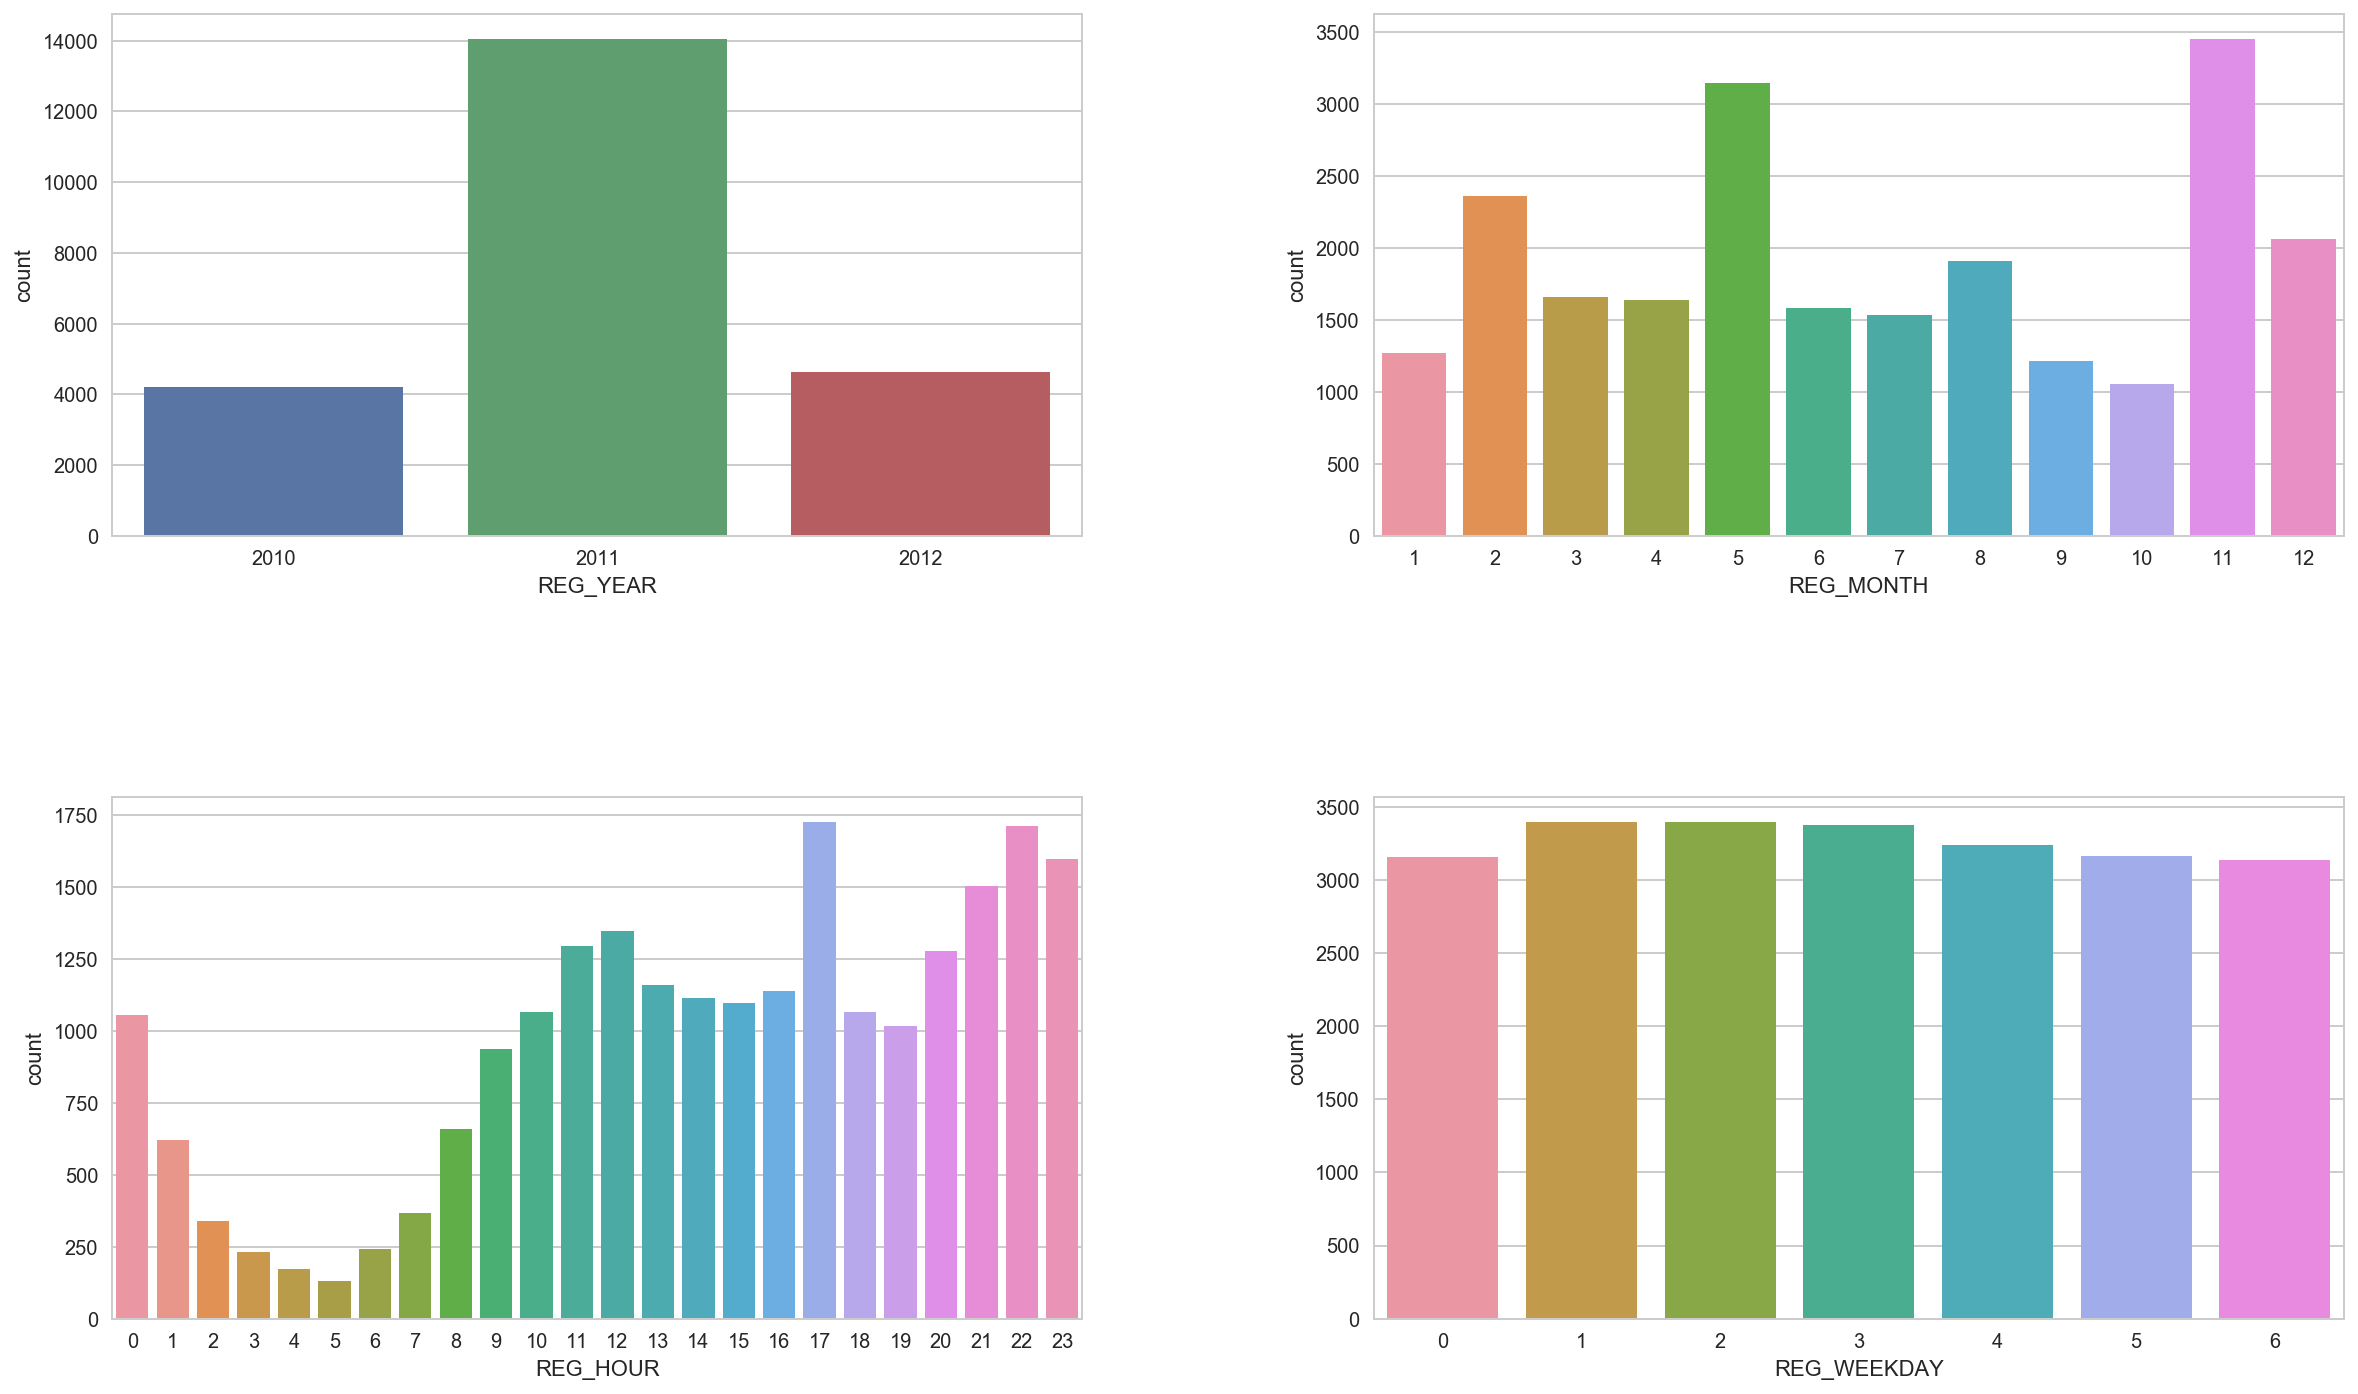

In [8]:
# normal distribution
plt.figure(figsize=(20, 12))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

for i in range(6, 9+1):
    plt.subplot(2,2,i-5)
    sns.countplot(x = user_list.columns[i], data = user_list)
    
plt.show()

### 2.2 SEX_ID (성별)

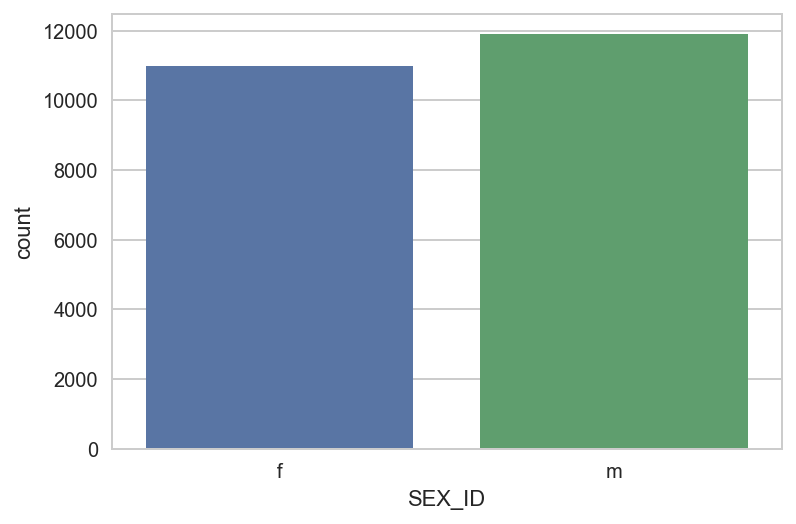

In [9]:
sns.countplot(x = 'SEX_ID', data = user_list)
plt.show()

### 2.3 AGE (나이)

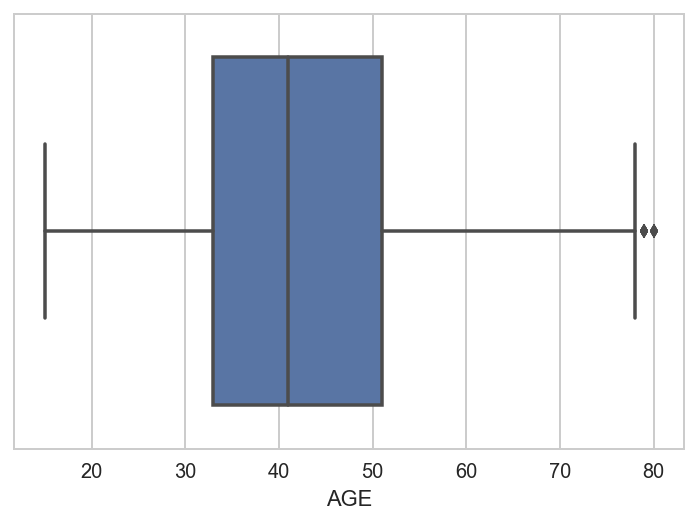

count    22873.000000
mean        42.497836
std         11.843465
min         15.000000
25%         33.000000
50%         41.000000
75%         51.000000
max         80.000000
Name: AGE, dtype: float64


In [13]:
# AGE Boxplot
sns.boxplot(user_list['AGE'])
plt.show()

print(user_list['AGE'].describe())

### 2.4 WITHDRAW_DATE (탈퇴날짜)

In [11]:
# 날짜를 나눠서 보기
user_list["WITHDRAW_DATE"] = pd.to_datetime(user_list["WITHDRAW_DATE"]) 
user_list["WD_YEAR"] = user_list["WITHDRAW_DATE"].dt.year 
user_list["WD_MONTH"] = user_list["WITHDRAW_DATE"].dt.month 
user_list["WD_HOUR"] = user_list["WITHDRAW_DATE"].dt.hour
user_list["WD_WEEKDAY"] = user_list["WITHDRAW_DATE"].dt.weekday

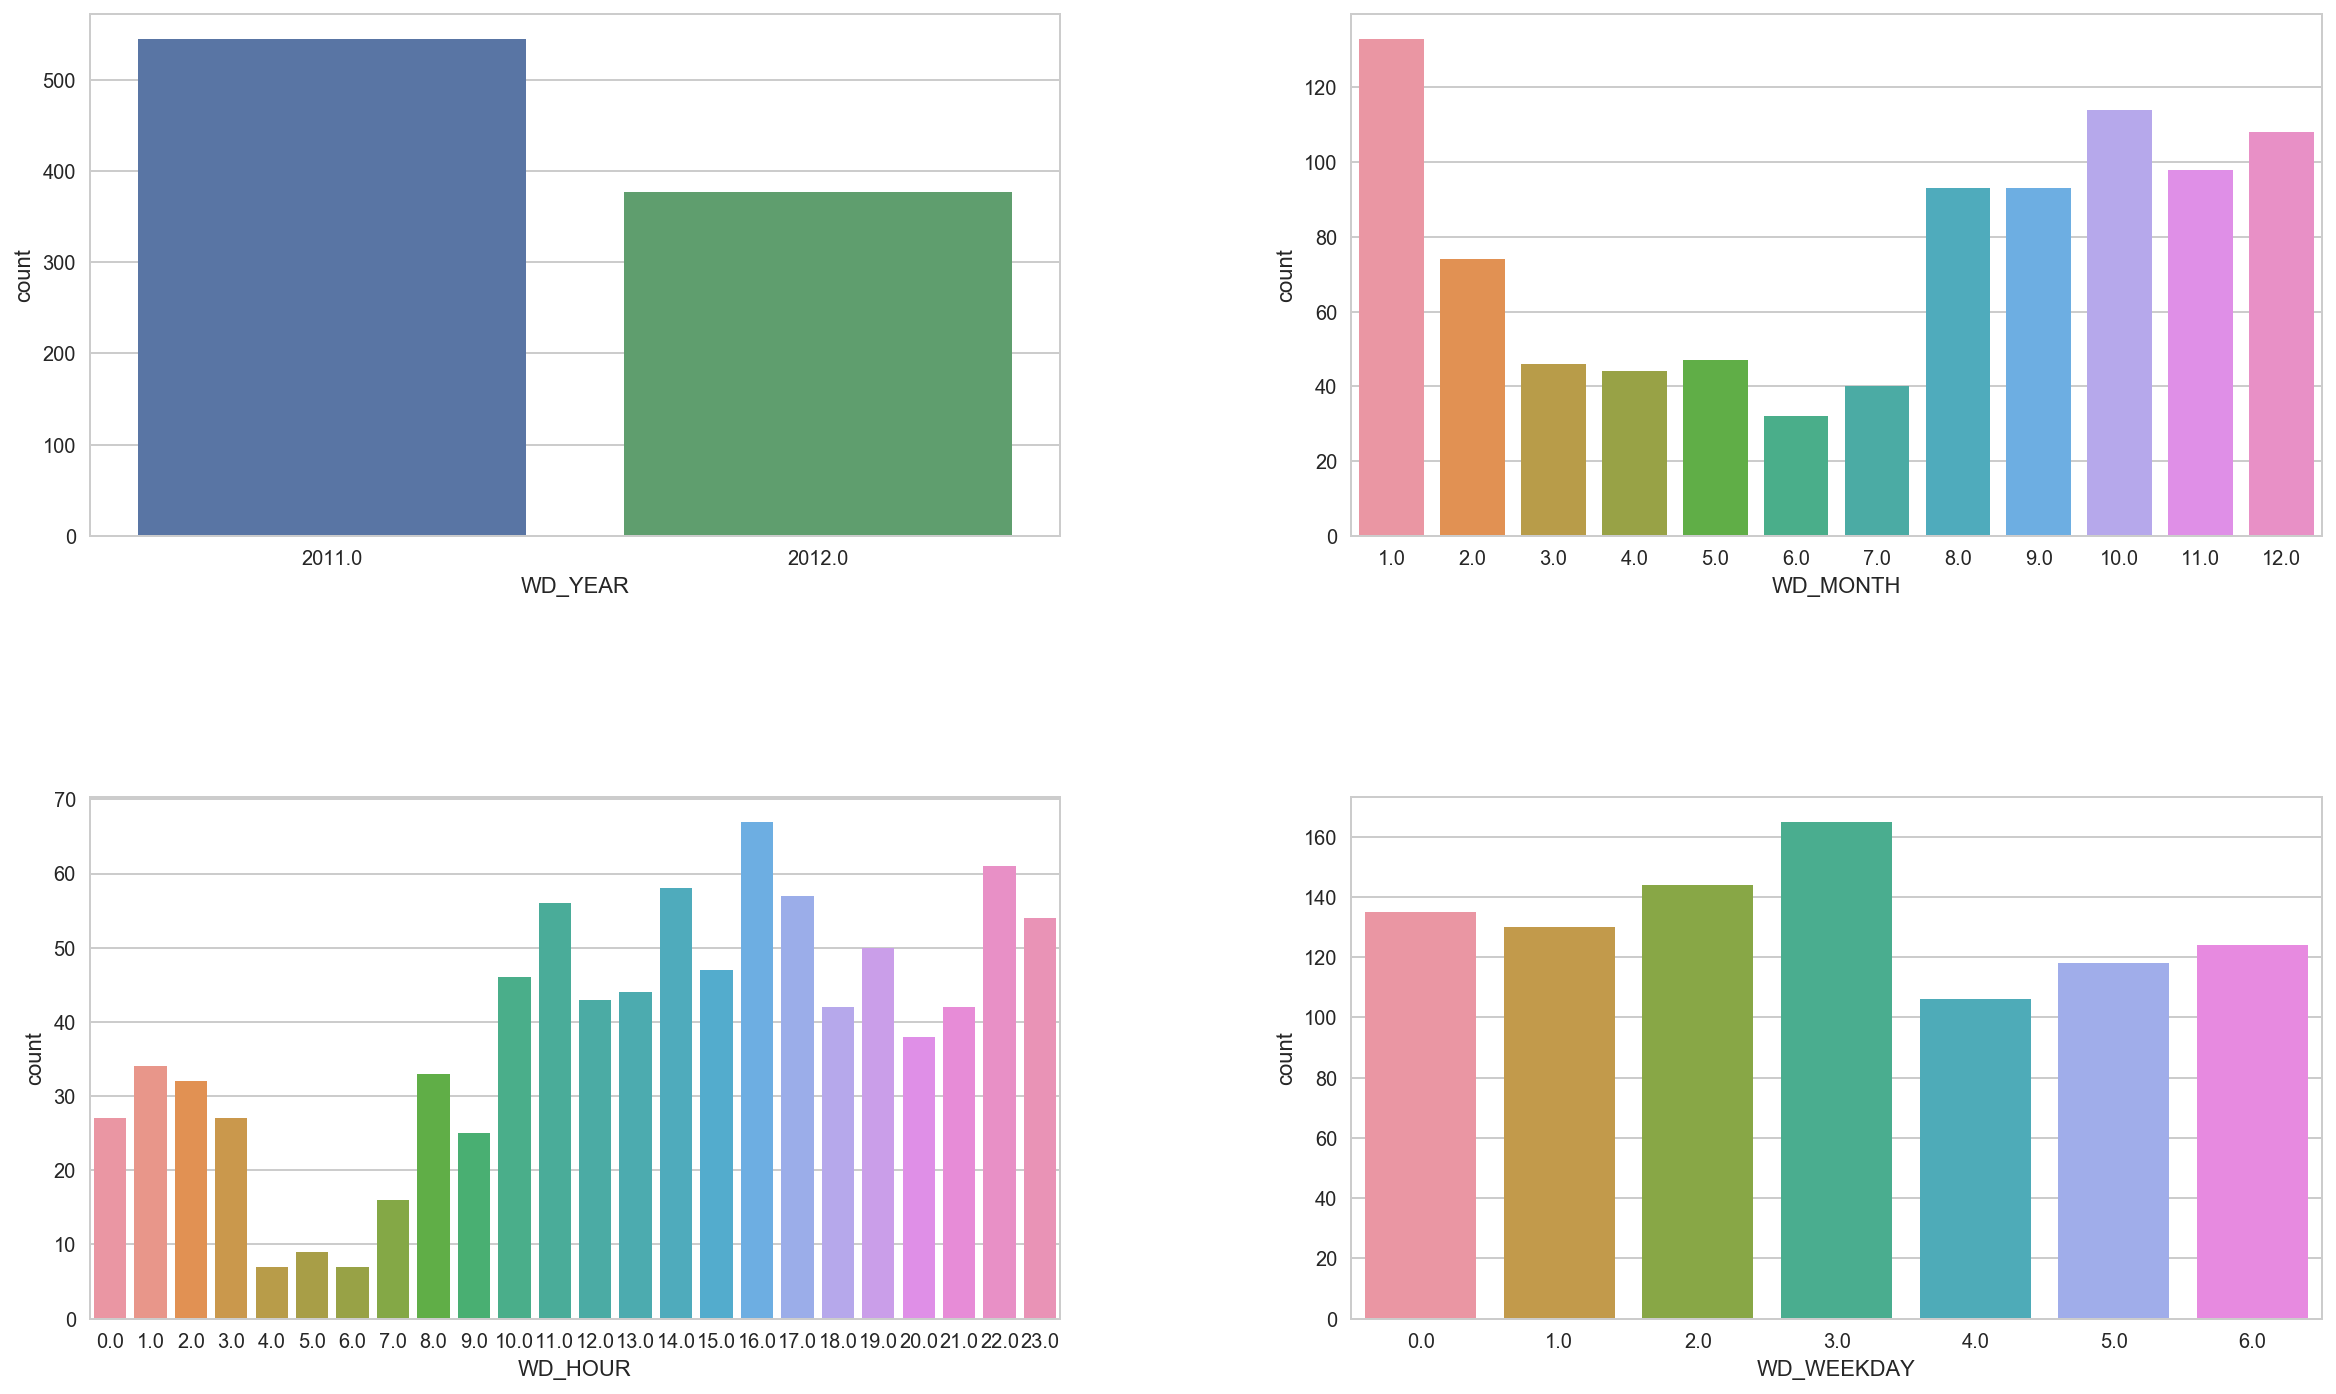

In [12]:
# normal distribution
plt.figure(figsize=(20, 12))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

for i in range(10, 13+1):
    plt.subplot(2,2,i-9)
    sns.countplot(x = user_list.columns[i], data = user_list)
    
plt.show()

### 2.5 PREF_NAME (행정구역)

In [25]:
prefectual_name = user_list.groupby("PREF_NAME").size().reset_index(name='counts')
prefectual_name = preff_name.sort_values(by=['counts'], ascending=False)
prefectual_name = preff_name.reset_index(drop=True)
prefectual_name.head()

,PREF_NAME,counts
0,東京都,2830
1,神奈川県,1653
2,大阪府,1638
3,愛知県,938
4,兵庫県,879


---

## 3. Coupon_List

In [23]:
coupon_list = pd.read_csv('../data/coupon_list_train.csv')
coupon_list.tail()

,CAPSULE_TEXT,GENRE_NAME,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPFROM,DISPEND,DISPPERIOD,VALIDFROM,VALIDEND,...,USABLE_DATE_THU,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,large_area_name,ken_name,small_area_name,COUPON_ID_hash
19408,ネイル・アイ,ネイル・アイ,65,10000,3500,2011-07-14 12:00:00,2011-07-17 12:00:00,3,2011-07-18,2011-12-30,...,1.0,1.0,1.0,1.0,1.0,1.0,北信越,新潟県,新潟,fe334f1a5e0dc54eca76b9dd9559661b
19409,グルメ,グルメ,50,5980,2990,2011-09-30 12:00:00,2011-10-03 12:00:00,3,2011-10-04,2012-02-29,...,1.0,1.0,1.0,1.0,1.0,1.0,関東,東京都,新宿・高田馬場・中野・吉祥寺,8dc11b257cb1c5b98e7b7c66d9b2b779
19410,グルメ,グルメ,50,6300,3150,2011-09-03 12:00:00,2011-09-05 12:00:00,2,2011-09-06,2011-11-30,...,1.0,2.0,2.0,1.0,1.0,2.0,関東,東京都,渋谷・青山・自由が丘,b15e2d7619c3fd9c6be567c971bdf4f4
19411,グルメ,グルメ,50,2400,1200,2011-07-15 12:00:00,2011-07-17 12:00:00,2,2011-07-18,2011-10-31,...,1.0,1.0,1.0,1.0,1.0,1.0,関東,東京都,銀座・新橋・東京・上野,e1141a4b2798450f36e40090659c0b07
19412,グルメ,グルメ,60,6000,2400,2011-07-23 12:00:00,2011-07-26 12:00:00,3,2011-07-27,2011-11-30,...,1.0,0.0,0.0,1.0,1.0,0.0,関東,東京都,新宿・高田馬場・中野・吉祥寺,79303de03e3af7105cded55960d62ac3


In [24]:
coupon_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19413 entries, 0 to 19412
Data columns (total 24 columns):
CAPSULE_TEXT                  19413 non-null object
GENRE_NAME                    19413 non-null object
PRICE_RATE                    19413 non-null int64
CATALOG_PRICE                 19413 non-null int64
DISCOUNT_PRICE                19413 non-null int64
DISPFROM                      19413 non-null object
DISPEND                       19413 non-null object
DISPPERIOD                    19413 non-null int64
VALIDFROM                     13266 non-null object
VALIDEND                      13266 non-null object
VALIDPERIOD                   13266 non-null float64
USABLE_DATE_MON               12408 non-null float64
USABLE_DATE_TUE               12408 non-null float64
USABLE_DATE_WED               12408 non-null float64
USABLE_DATE_THU               12408 non-null float64
USABLE_DATE_FRI               12408 non-null float64
USABLE_DATE_SAT               12408 non-null float64
USAB

|Column Name|	Description|	Type|	Length|	Decimal	Note|
|-|-|-|-|-|
|CAPSULE_TEXT|Capsule text|VARCHAR220||[JPN]|
|GENRE_NAME|Category name|VARCHAR250||[JPN]|	 	 	 
|PRICE_RATE|Discount rate|NUMBER4 |0||	 	 	 	 
|CATALOG_PRICE|List price|NUMBER10| 0|	| 	 	 	 
|DISCOUNT_PRICE|Discount price|	NUMBER10| 0||	 	 	 	 
|DISPFROM|Sales release date|DATE|	||	 	 	 	 	 
|DISPEND|Sales end date |DATE|	 ||	 	 	 	 	 
|DISPPERIOD|Sales period (day)|	NUMBER4|	0|	 |	 	 	 
|VALIDFROM|	The term of validity starts|DATE| |	 |	 	 	 	 
|VALIDEND|	The term of validity ends|	DATE|	| 	 	 	 	 	 
|VALIDPERIOD	|Validity period (day)|	NUMBER4|0	|| 	 	 	 
|USABLE_DATE_MON|	Is available on Monday|	CHAR|	1|	| 	 	 	 	 
|USABLE_DATE_TUE|	Is available on Tuesday	|CHAR|	1|	| 	| 	 	 	 
|USABLE_DATE_WED|	Is available on Wednesday|	CHAR|	1| ||	 	 	 	 
|USABLE_DATE_THU|	Is available on Thursday|	CHAR|	1||	 	 	 	 	 
|USABLE_DATE_FRI|	Is available on Friday|	CHAR|	1|	 |	 	 	 	 
|USABLE_DATE_SAT|	Is available on Saturday|	CHAR|	1||	 	 	 	 	 
|USABLE_DATE_SUN|	Is available on Sunday|	CHAR|	1|	 |	 	 	 	 
|USABLE_DATE_HOLIDAY|	Is available on holiday|CHAR|	1|	| 	 	 	 	 
|USABLE_DATE_BEFORE_HOLIDAY|	Is available on the day before holiday|	CHAR|	1|	| 	 	 	 	 
|large_area_name|	Large area name of shop location|VARCHAR230||[JPN]| 	 	 
|ken_name|	Prefecture name of shop	|VARCHAR28||	 	[JPN]	| 	 	 
|small_area_name|Small area name of shop location|VARCHAR230||[JPN]|	 	 	 
|COUPON_ID_hash|	Coupon ID|VARCHAR232|	 |

In [8]:
coupon_list.describe()

,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPPERIOD,VALIDPERIOD,USABLE_DATE_MON,USABLE_DATE_TUE,USABLE_DATE_WED,USABLE_DATE_THU,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY
count,19413.000000,19413.000000,19413.000000,19413.000000,13266.000000,12408.000000,12408.000000,12408.000000,12408.000000,12408.000000,12408.000000,12408.000000,12408.000000,12408.000000
mean,58.478391,11818.368258,4332.877659,3.166950,125.955902,0.936009,0.953901,0.982189,0.981867,1.000242,1.067618,0.921422,0.938024,1.044246
std,11.266571,16881.898880,5459.667448,1.346859,46.599249,0.309854,0.314045,0.217525,0.198105,0.319562,0.563260,0.424181,0.399619,0.534511
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,3675.000000,1550.000000,2.000000,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,53.000000,6500.000000,2750.000000,3.000000,128.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,65.000000,13650.000000,4800.000000,4.000000,177.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,100.000000,680000.000000,100000.000000,36.000000,179.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
